In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Af04604195,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
2,Af07527693,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
3,Af11267444,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Af12688448,Afghanistan,2005,Developing,57.3,291.0,85,0.02,1.388648,66.0,...,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9


In [4]:
test.head()

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,Cr10129453,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,Mo67025598,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,Ba38246112,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
4,Ke57254548,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [6]:
train.shape

(2350, 23)

In [7]:
test.shape

(588, 22)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under-five deaths   

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               588 non-null    object 
 1   Country                          588 non-null    object 
 2   Year                             588 non-null    int64  
 3   Status                           588 non-null    object 
 4   Adult Mortality                  586 non-null    float64
 5   infant deaths                    588 non-null    int64  
 6   Alcohol                          552 non-null    float64
 7   percentage expenditure           588 non-null    float64
 8   Hepatitis B                      474 non-null    float64
 9   Measles                          588 non-null    int64  
 10  BMI                              581 non-null    float64
 11  under-five deaths                588 non-null    int64  
 12  Polio                 

In [10]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2350.000000,2342.000000,2350.000000,2192.000000,2350.000000,1911.000000,2350.000000,2323.000000,2350.000000,2336.000000,2165.000000,2336.000000,2350.000000,2005.000000,1.834000e+03,2323.000000,2323.000000,2219.000000,2221.000000
mean,2007.537447,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,4.611986,9.573065,125.273598,111.836006,4.034828,1952.616462,24.821252,11589.618520,20.073857,152.939537,23.363327,2.509597,23.793441,5.266324,14189.942344,5.480387e+07,4.403585,4.482891,0.207573,3.346762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,0.850000,5.491010,77.000000,0.000000,19.400000,0.000000,78.000000,4.260000,78.000000,0.100000,462.517913,1.943552e+05,1.600000,1.500000,0.497000,10.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.760000,65.611455,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1774.929100,1.416448e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.700000,227.750000,20.750000,7.622500,441.534144,97.000000,356.250000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5859.915622,7.442611e+06,7.100000,7.100000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
test.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,588.000000,586.000000,588.000000,552.000000,588.000000,474.000000,588.000000,581.000000,588.000000,583.000000,547.000000,583.000000,588.000000,485.000000,4.520000e+02,581.00000,581.000000,552.000000,554.000000
mean,2007.443878,160.689420,36.341837,4.640942,809.110761,80.128692,2822.804422,37.379518,49.794218,81.974271,5.946124,82.113208,1.562415,7890.504183,1.612449e+07,4.99759,4.998451,0.613348,11.851083
std,4.624420,120.306158,139.587066,4.124987,2123.408651,26.060068,10964.956359,19.913699,187.414890,23.697065,2.455425,23.426808,4.240632,14604.993842,8.147891e+07,4.48635,4.613042,0.223427,3.406595
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,3.685949,3.600000e+01,0.10000,0.100000,0.000000,0.000000
25%,2003.000000,69.000000,0.000000,0.950000,2.717652,76.000000,0.000000,18.800000,0.000000,77.000000,4.290000,77.000000,0.100000,465.119887,2.231182e+05,1.60000,1.500000,0.483750,9.900000
50%,2007.000000,141.000000,3.000000,3.725000,62.695106,92.000000,17.500000,41.400000,4.000000,93.000000,5.800000,93.000000,0.100000,1741.142552,1.323676e+06,3.50000,3.500000,0.656500,12.100000
75%,2011.000000,227.750000,26.250000,7.977500,432.321465,97.000000,372.750000,56.000000,36.250000,97.000000,7.465000,97.000000,0.800000,6256.559260,7.245294e+06,7.50000,7.400000,0.778500,14.175000
max,2015.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,131441.000000,79.300000,2400.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,1.161978e+09,27.50000,28.500000,0.942000,20.600000


In [13]:
# Loop code to get all the columns with missing values with No of missing values:
for i,j in zip(train.isna().sum(), train.columns):
    if i!=0:
        print(f"{j} column has {i} missinng values")

Adult Mortality column has 8 missinng values
Alcohol column has 158 missinng values
Hepatitis B column has 439 missinng values
BMI column has 27 missinng values
Polio column has 14 missinng values
Total expenditure column has 185 missinng values
Diphtheria column has 14 missinng values
GDP column has 345 missinng values
Population column has 516 missinng values
thinness  1-19 years column has 27 missinng values
thinness 5-9 years column has 27 missinng values
Income composition of resources column has 131 missinng values
Schooling column has 129 missinng values


In [14]:
for i,j in zip(test.isna().sum(), test.columns):
    if i!=0:
        print(f" {j} column has {i} missinng values")

 Adult Mortality column has 2 missinng values
 Alcohol column has 36 missinng values
 Hepatitis B column has 114 missinng values
 BMI column has 7 missinng values
 Polio column has 5 missinng values
 Total expenditure column has 41 missinng values
 Diphtheria column has 5 missinng values
 GDP column has 103 missinng values
 Population column has 136 missinng values
 thinness  1-19 years column has 7 missinng values
 thinness 5-9 years column has 7 missinng values
 Income composition of resources column has 36 missinng values
 Schooling column has 34 missinng values


In [15]:
#loop code for calculating the mean for columns with missing values alone:train data
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        print(f"Mean value for '{column}' is {mean_value}")

Mean value for 'Adult Mortality' is 165.82408198121263
Mean value for 'Alcohol' is 4.59327098540146
Mean value for 'Hepatitis B' is 81.14181057038199
Mean value for 'BMI' is 38.55678002582867
Mean value for 'Polio' is 82.69392123287672
Mean value for 'Total expenditure' is 5.936184757505774
Mean value for 'Diphtheria' is 82.37671232876713
Mean value for 'GDP' is 7384.623471088378
Mean value for 'Population' is 11922543.676897492
Mean value for 'thinness  1-19 years' is 4.800215238915196
Mean value for 'thinness 5-9 years' is 4.838269479121825
Mean value for 'Income composition of resources' is 0.6310842721946823
Mean value for 'Schooling' is 12.028140477262495


In [16]:
#test data
for column in test.columns:
    if test[column].isnull().any():
        mean_value = test[column].mean()
        print(f"Mean value for '{column}' is {mean_value}")

Mean value for 'Adult Mortality' is 160.68941979522185
Mean value for 'Alcohol' is 4.640942028985507
Mean value for 'Hepatitis B' is 80.12869198312237
Mean value for 'BMI' is 37.37951807228916
Mean value for 'Polio' is 81.97427101200687
Mean value for 'Total expenditure' is 5.946124314442413
Mean value for 'Diphtheria' is 82.11320754716981
Mean value for 'GDP' is 7890.504182727011
Mean value for 'Population' is 16124492.081880532
Mean value for 'thinness  1-19 years' is 4.997590361445784
Mean value for 'thinness 5-9 years' is 4.998450946643717
Mean value for 'Income composition of resources' is 0.6133478260869565
Mean value for 'Schooling' is 11.851083032490974


In [17]:
# loop codes to fill in missing values with there respective mean values: Train
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column].fillna(mean_value, inplace=True)

In [18]:
#test data:
for column in test.columns:
    if test[column].isnull().any():
        mean_value =test[column].mean()
        test[column].fillna(mean_value, inplace=True)

In [19]:
# the categorical data are as follows:train data
categorical_columns =[]
for col in train.columns:
    if train[col].dtype == "object":
        categorical_columns.append(col)
        
categorical_columns

['ID', 'Country', 'Status']

In [20]:
#test data:
categorical_columns =[]
for col in test.columns:
    if test[col].dtype == "object":
        categorical_columns.append(col)
        
categorical_columns

['ID', 'Country', 'Status']

In [21]:
#OneHotEncoding for status:train data
train["Status"]=  pd.get_dummies(train["Status"])["Developed"]

In [22]:
# test data:
test["Status"]= pd.get_dummies(test["Status"])["Developed"]

In [23]:
#LabelEncoder for country:train data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


train["Country"] =  encoder.fit_transform(train["Country"])

In [24]:
#test data:
test["Country"] = encoder.fit_transform(test["Country"])

In [25]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", None)

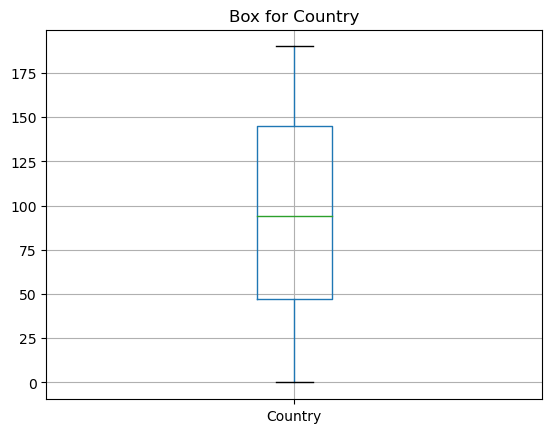

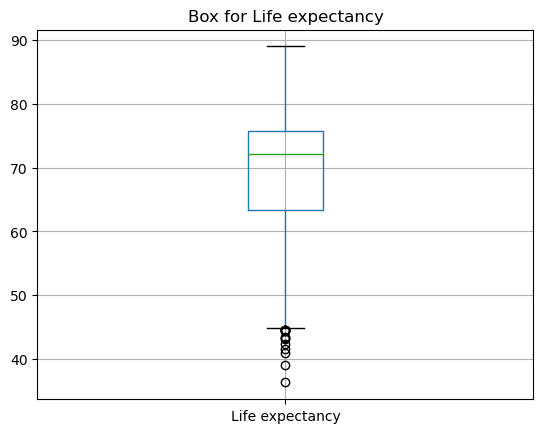

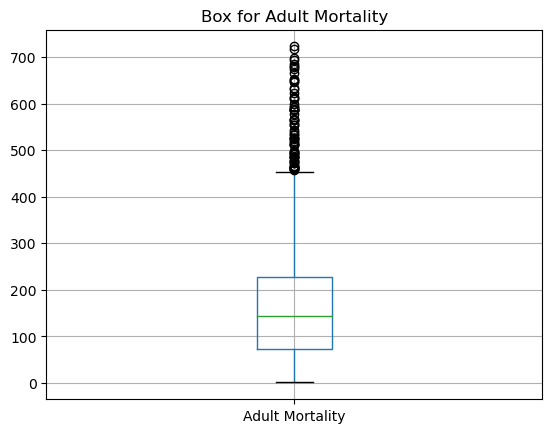

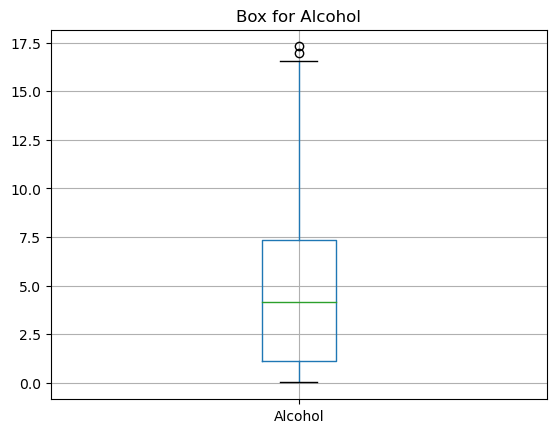

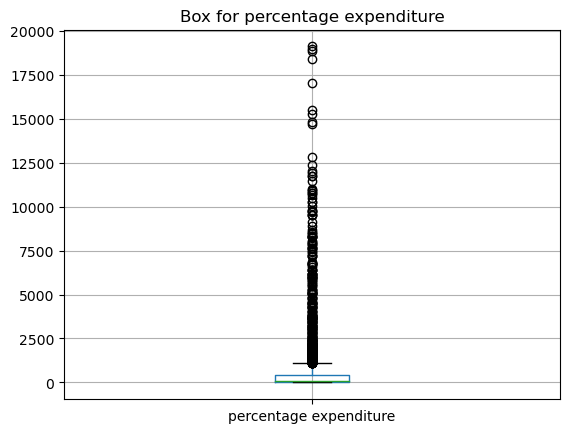

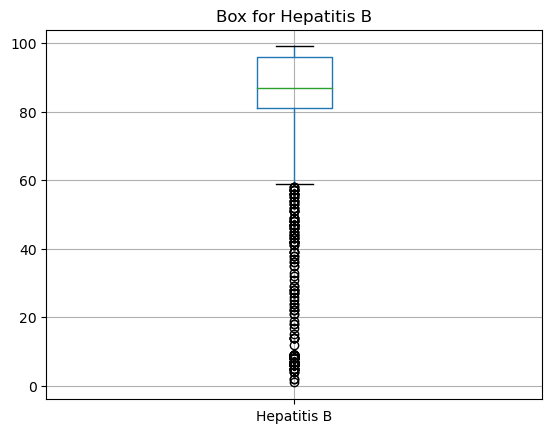

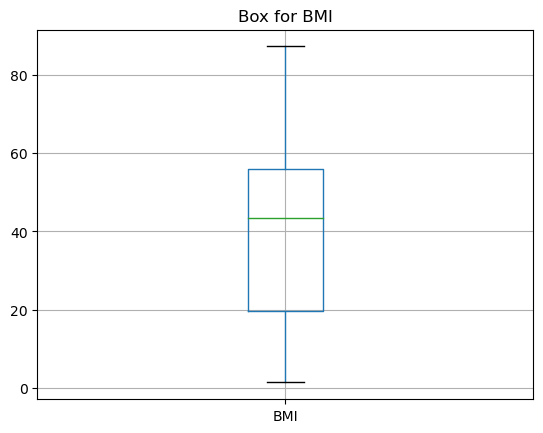

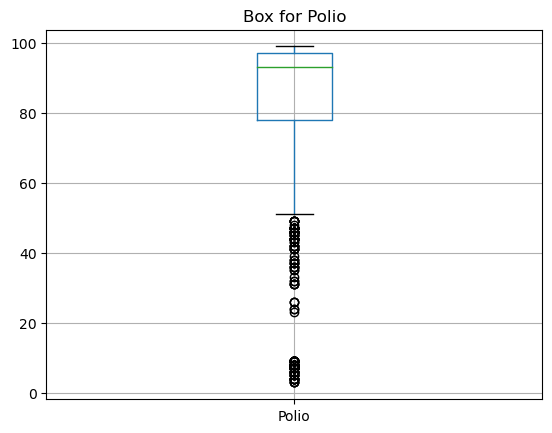

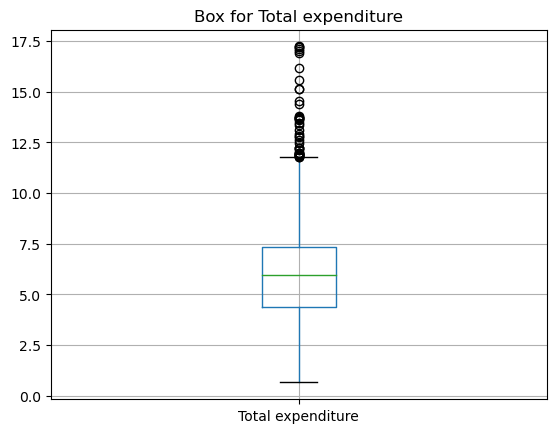

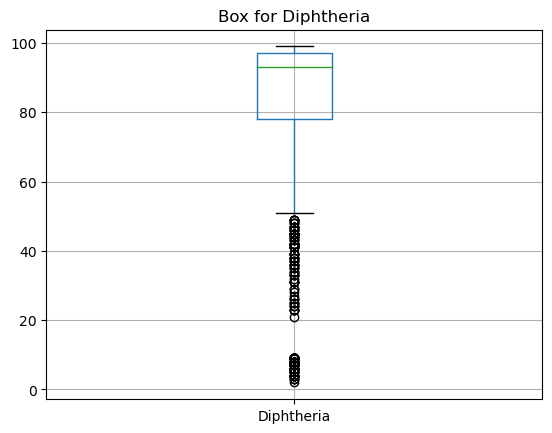

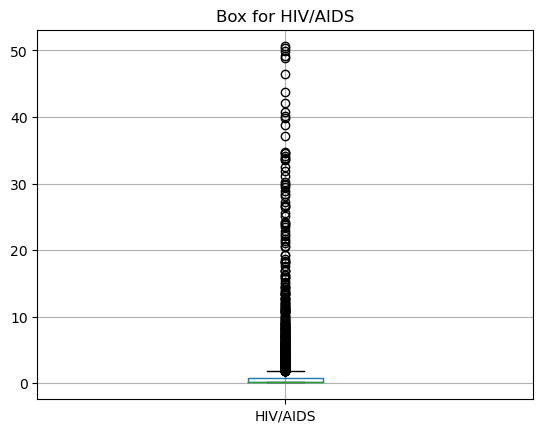

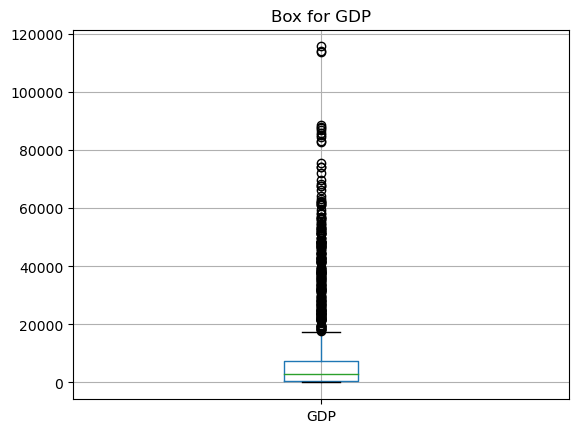

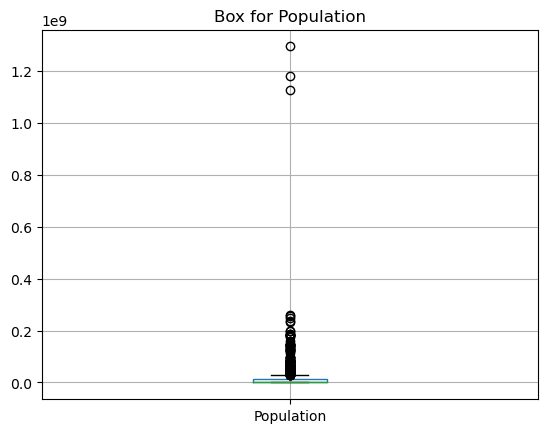

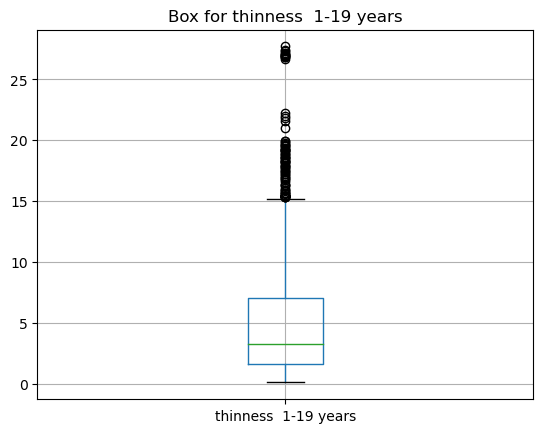

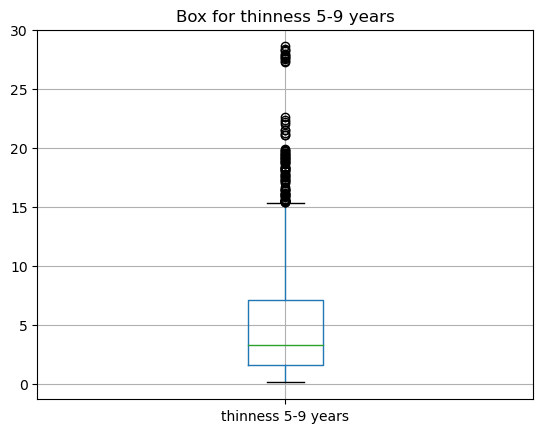

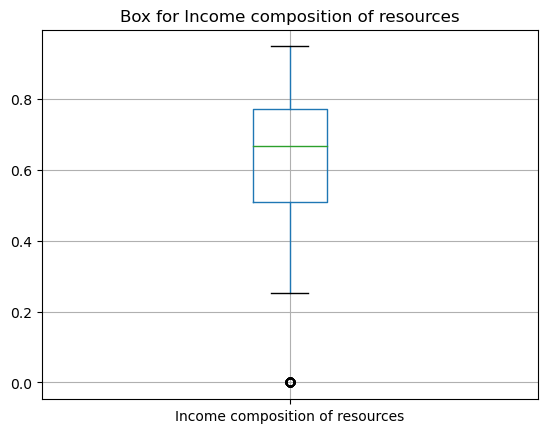

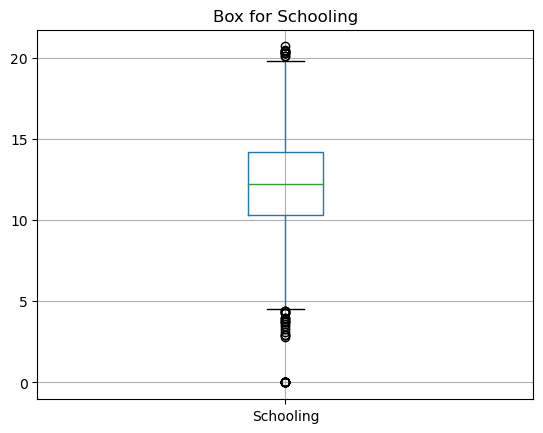

In [26]:
import matplotlib.pyplot as plt
for column in train.columns:
    if train[column].dtype in [int, float]:
        plt.figure()
        train.boxplot(column=column)
        plt.title(f"Box for {column}")
        plt.show

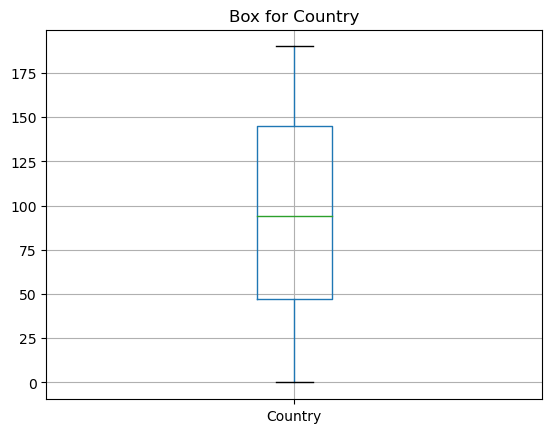

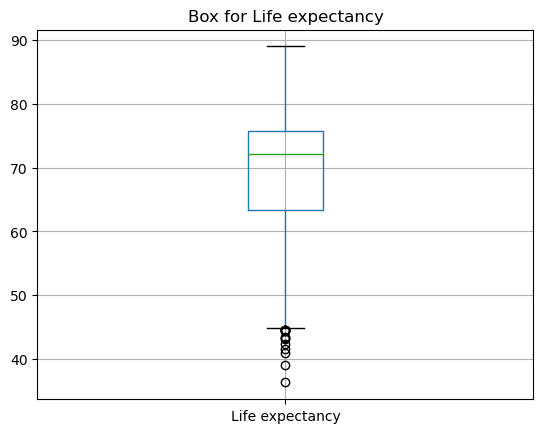

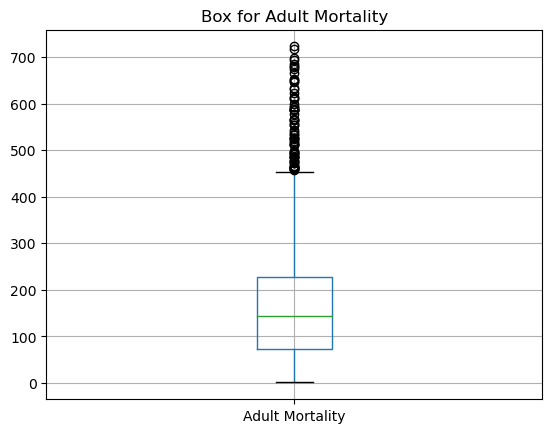

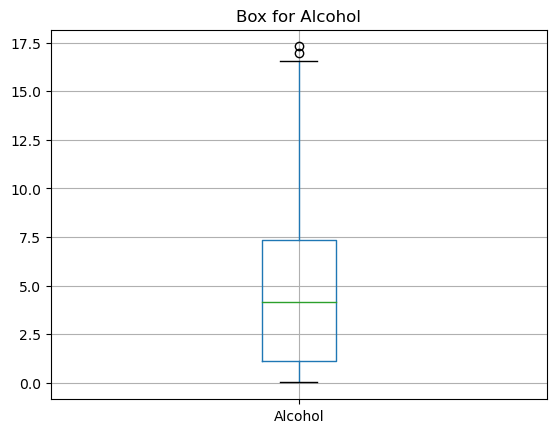

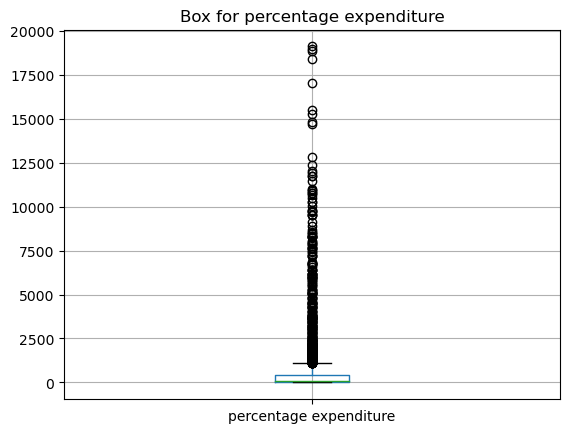

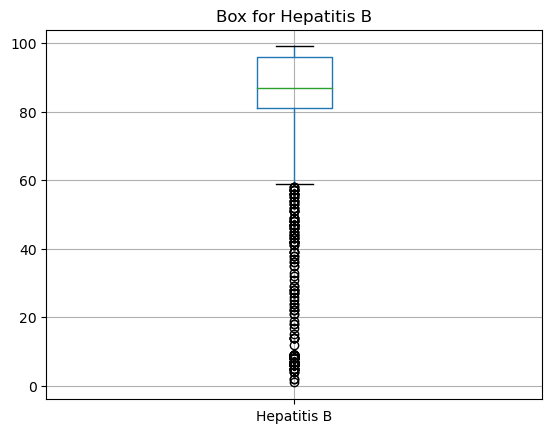

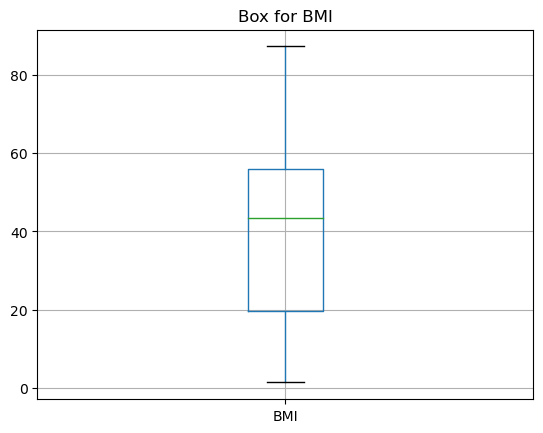

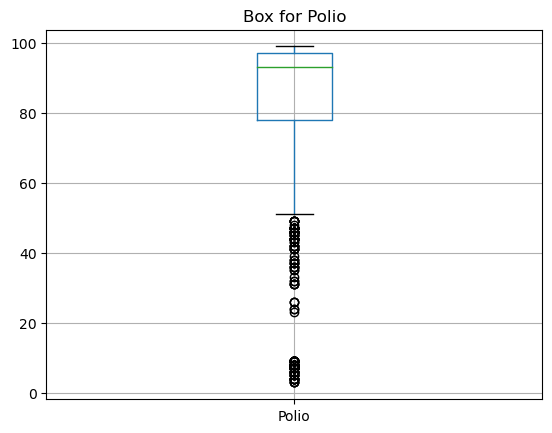

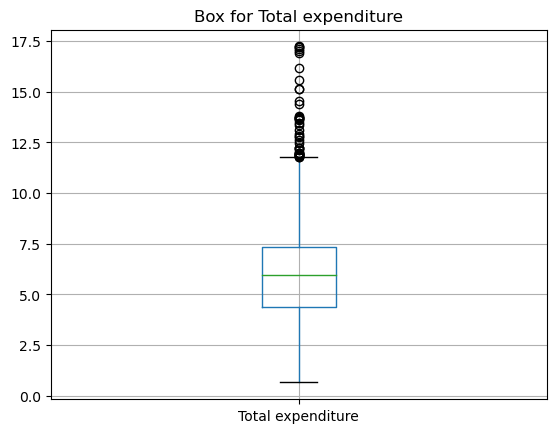

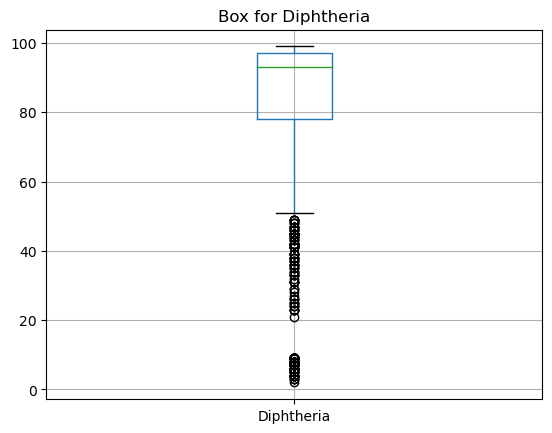

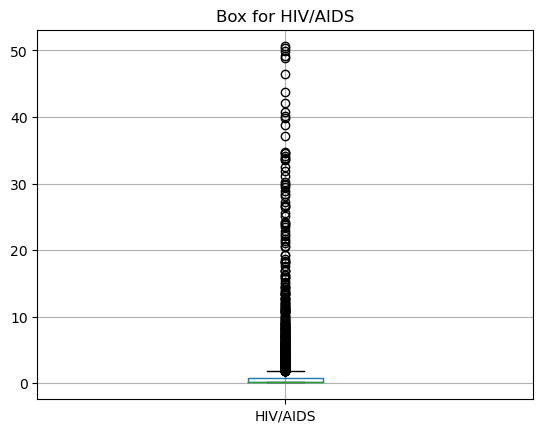

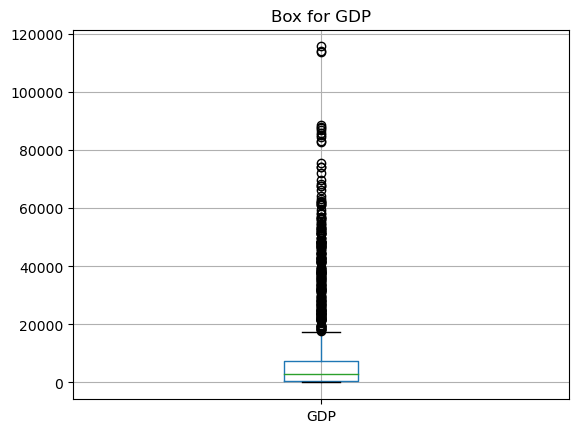

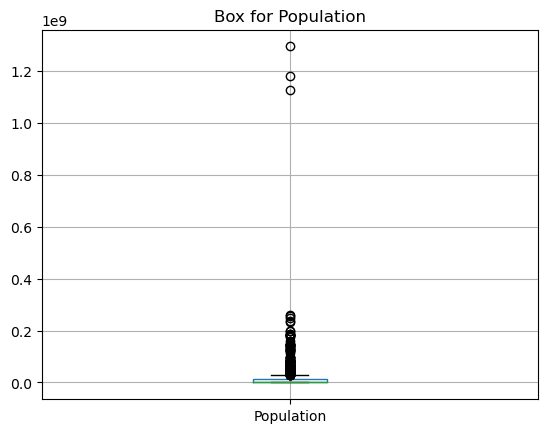

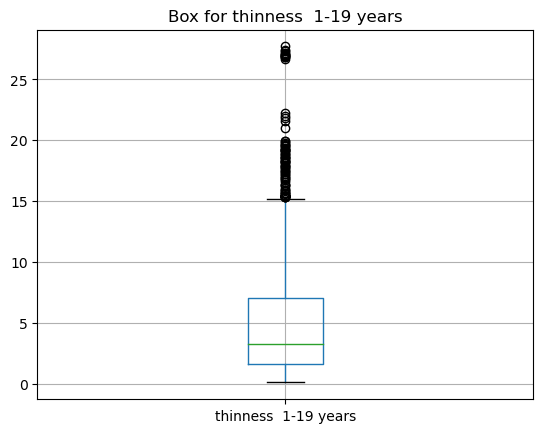

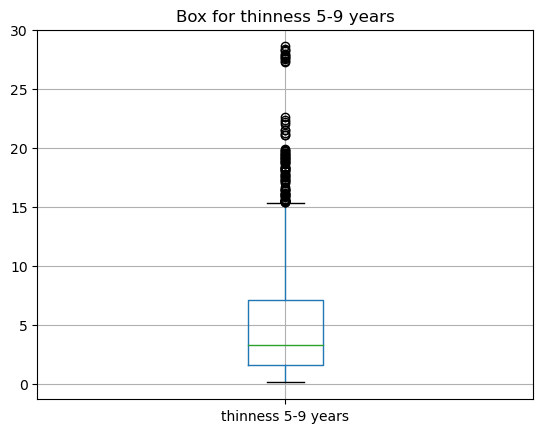

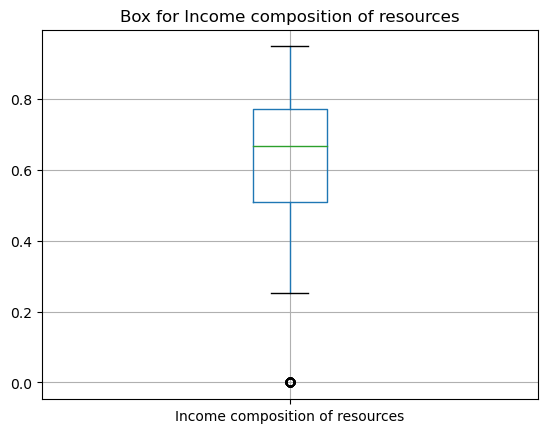

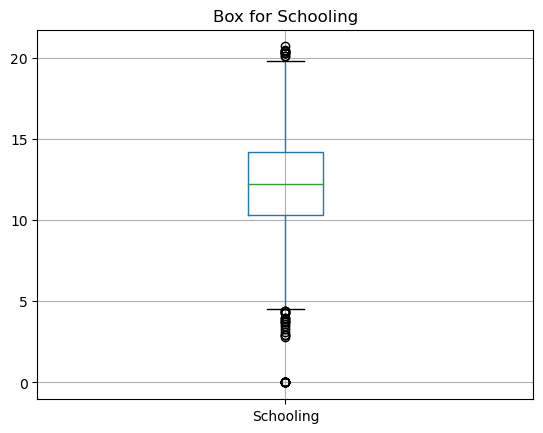

In [27]:
import matplotlib.pyplot as plt
for column in train.columns:
    if train[column].dtype in [int, float]:
        plt.figure()
        train.boxplot(column=column)
        plt.title(f"Box for {column}")
        plt.show

In [28]:
train.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000,2350.000000
mean,95.365532,2007.537447,0.176596,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,55.753254,4.611986,0.381407,9.573065,125.060094,111.836006,3.896770,1952.616462,22.381998,11589.618520,19.958157,152.939537,23.293600,2.408747,23.722431,5.266324,13106.537701,4.841177e+07,4.378204,4.457052,0.201702,3.253567
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,47.000000,2004.000000,0.000000,63.300000,74.000000,0.000000,1.100000,5.491010,81.141811,0.000000,19.600000,0.000000,78.000000,4.372500,78.000000,0.100000,564.088121,3.949550e+05,1.600000,1.600000,0.509000,10.300000
50%,94.000000,2008.000000,0.000000,72.200000,144.000000,3.000000,4.160000,65.611455,87.000000,16.000000,43.500000,4.000000,93.000000,5.936185,93.000000,0.100000,3054.363603,3.746860e+06,3.300000,3.300000,0.668000,12.200000
75%,145.000000,2012.000000,0.000000,75.700000,227.000000,20.750000,7.327500,441.534144,96.000000,356.250000,56.100000,26.000000,97.000000,7.340000,97.000000,0.800000,7384.623471,1.192254e+07,7.075000,7.100000,0.773000,14.200000
max,190.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [30]:
test.describe()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02,588.00000,588.000000,588.000000,588.000000
mean,86.637755,2007.443878,0.164966,160.689420,36.341837,4.640942,809.110761,80.128692,2822.804422,37.379518,49.794218,81.974271,5.946124,82.113208,1.562415,7890.504183,1.612449e+07,4.99759,4.998451,0.613348,11.851083
std,52.081770,4.624420,0.371466,120.101033,139.587066,3.996495,2123.408651,23.393062,10964.956359,19.794607,187.414890,23.595925,2.368121,23.326821,4.240632,13261.877390,7.141911e+07,4.45952,4.585454,0.216468,3.306466
min,0.000000,2000.000000,0.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,3.685949,3.600000e+01,0.10000,0.100000,0.000000,0.000000
25%,40.000000,2003.000000,0.000000,69.000000,0.000000,1.027500,2.717652,80.128692,0.000000,18.975000,0.000000,77.000000,4.347500,77.750000,0.100000,611.124631,4.732078e+05,1.60000,1.600000,0.491750,10.100000
50%,84.000000,2007.000000,0.000000,141.000000,3.000000,4.110000,62.695106,86.000000,17.500000,40.500000,4.000000,93.000000,5.946124,92.500000,0.100000,3193.657230,3.451434e+06,3.60000,3.500000,0.640500,11.900000
75%,133.000000,2011.000000,0.000000,227.250000,26.250000,7.725000,432.321465,96.000000,372.750000,55.825000,36.250000,97.000000,7.300000,97.000000,0.800000,7890.504183,1.612449e+07,7.50000,7.400000,0.770250,14.000000
max,179.000000,2015.000000,1.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,131441.000000,79.300000,2400.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,1.161978e+09,27.50000,28.500000,0.942000,20.600000


<Axes: xlabel='GDP'>

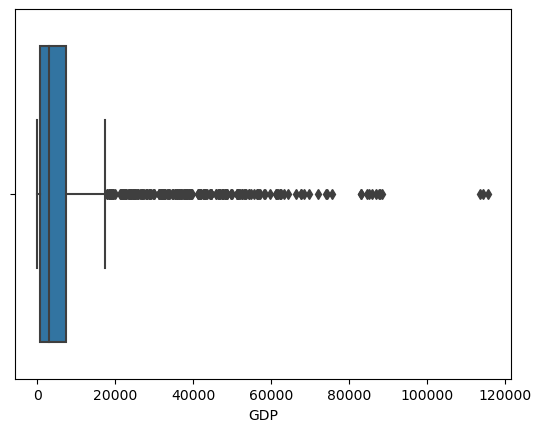

In [31]:
sns.boxplot(x=train["GDP"])

In [32]:
#using percentile method:
np.percentile(train.GDP,[99])

array([62337.138202])

In [33]:
np.percentile(test.GDP,[99])

array([57885.7382125])

In [34]:
np.percentile(train.Population,[99])

array([1.43672106e+08])

In [35]:
np.percentile(test.Population,[99])

array([1.7197312e+08])

In [36]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [37]:
np.percentile(train['thinness  1-19 years'],[99])

array([19.451])

In [38]:
np.percentile(test['thinness  1-19 years'],[99])

array([19.895])

In [39]:
np.percentile(train['thinness 5-9 years'],[99])

array([19.7])

In [40]:
np.percentile(test['thinness 5-9 years'],[99])

array([21.352])

In [41]:
np.percentile(train.GDP,[99])[0]

62337.13820199996

In [42]:
np.percentile(test.GDP,[99])[0]

57885.738212499986

In [43]:
np.percentile(train.Population,[99])[0]

143672105.92999992

In [44]:
np.percentile(test.Population,[99])[0]

171973120.16

In [45]:
np.percentile(train['thinness  1-19 years'],[99])[0]

19.450999999999976

In [46]:
np.percentile(test['thinness  1-19 years'],[99])[0]

19.894999999999992

In [47]:
np.percentile(train['thinness 5-9 years'],[99])[0]

19.7

In [48]:
np.percentile(test['thinness 5-9 years'],[99])[0]

21.352

In [49]:
uv = np.percentile(train.GDP,[99])[0]

In [50]:
uv = np.percentile(test.GDP,[99])[0]

In [51]:
uv = np.percentile(train.Population,[99])[0]

In [52]:
uv = np.percentile(test.Population,[99])[0]

In [53]:
uv = np.percentile(train['thinness  1-19 years'],[99])[0]

In [54]:
uv = np.percentile(test['thinness  1-19 years'],[99])[0]

In [55]:
uv = np.percentile(train['thinness 5-9 years'],[99])[0]

In [56]:
uv = np.percentile(test['thinness 5-9 years'],[99])[0]

In [57]:
train.GDP[(train.GDP> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\206411302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.GDP[(train.GDP> 3*uv)] = 3*uv


In [58]:
test.GDP[(test.GDP> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\1377429842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.GDP[(test.GDP> 3*uv)] = 3*uv


In [59]:
train.Population[(train.Population>3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\4013995617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Population[(train.Population>3*uv)] = 3*uv


In [60]:
test.Population[(test.Population>3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\2044887583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Population[(test.Population>3*uv)] = 3*uv


In [61]:
train['thinness  1-19 years'][(train['thinness  1-19 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\3557936221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['thinness  1-19 years'][(train['thinness  1-19 years']> 3*uv)] = 3*uv


In [62]:
test['thinness  1-19 years'][(test['thinness  1-19 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\3645146381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['thinness  1-19 years'][(test['thinness  1-19 years']> 3*uv)] = 3*uv


In [63]:
train['thinness 5-9 years'][(train['thinness 5-9 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\1282426304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['thinness 5-9 years'][(train['thinness 5-9 years']> 3*uv)] = 3*uv


In [64]:
test['thinness 5-9 years'][(test['thinness 5-9 years']> 3*uv)] = 3*uv

C:\Users\HP ELITEBOOK 840 G5\AppData\Local\Temp\ipykernel_7068\4172026451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['thinness 5-9 years'][(test['thinness 5-9 years']> 3*uv)] = 3*uv


In [65]:
## check for all columnns:
from scipy.stats import skew

train = pd.DataFrame(train)
train[train.columns] = train[train.columns].apply(pd.to_numeric, errors='coerce')

#skewness_results = train.apply(skew)
skewness_results={}
for column in train.columns:
    skewness_results[column] = train[column].skew()
    
print("skewness for each column:", skewness_results)

skewness for each column: {'ID': nan, 'Country': 0.002564164071840951, 'Year': -0.011045623766651512, 'Status': 1.6972913654465491, 'Life expectancy': -0.6618799474369444, 'Adult Mortality': 1.218376745477988, 'infant deaths': 9.925276935031041, 'Alcohol': 0.61645823425372, 'percentage expenditure': 4.749119081910268, 'Hepatitis B': -2.1671543948592458, 'Measles': 10.02621700229464, 'BMI': -0.23732084780097765, 'under-five deaths': 9.59675246410807, 'Polio': -2.1139523073532227, 'Total expenditure': 0.6529568900702688, 'Diphtheria': -2.087118377577452, 'HIV/AIDS': 5.356099424662294, 'GDP': -6.563985400830609, 'Population': -28.993586642814705, 'thinness  1-19 years': 1.7258169926189029, 'thinness 5-9 years': 1.7797245059063858, 'Income composition of resources': -1.1818259601899026, 'Schooling': -0.6059358902389733}


In [66]:
from scipy.stats import skew

test = pd.DataFrame(test)
test[test.columns] = test[test.columns].apply(pd.to_numeric, errors='coerce')

#skewness_results = train.apply(skew)
skewness_results={}
for column in test.columns:
    skewness_results[column] = test[column].skew()
    
print("skewness for each column:", skewness_results)

skewness for each column: {'ID': nan, 'Country': 0.0796196066322345, 'Year': 0.012227319441683792, 'Status': 1.8100047153413923, 'Adult Mortality': 0.9805425045681655, 'infant deaths': 9.08163128966675, 'Alcohol': 0.5861037317655616, 'percentage expenditure': 4.319805382121722, 'Hepatitis B': -2.0520854036498997, 'Measles': 6.6951867780927925, 'BMI': -0.1556738286959063, 'under-five deaths': 8.92479025699775, 'Polio': -2.0750974055323828, 'Total expenditure': 0.6076672831248059, 'Diphtheria': -2.05306871496337, 'HIV/AIDS': 5.25406625540121, 'GDP': -5.418031167237004, 'Population': -24.24871130596429, 'thinness  1-19 years': 1.7087491948698617, 'thinness 5-9 years': 1.818347597769771, 'Income composition of resources': -1.1422758265650172, 'Schooling': -0.6720753265094885}


<Axes: >

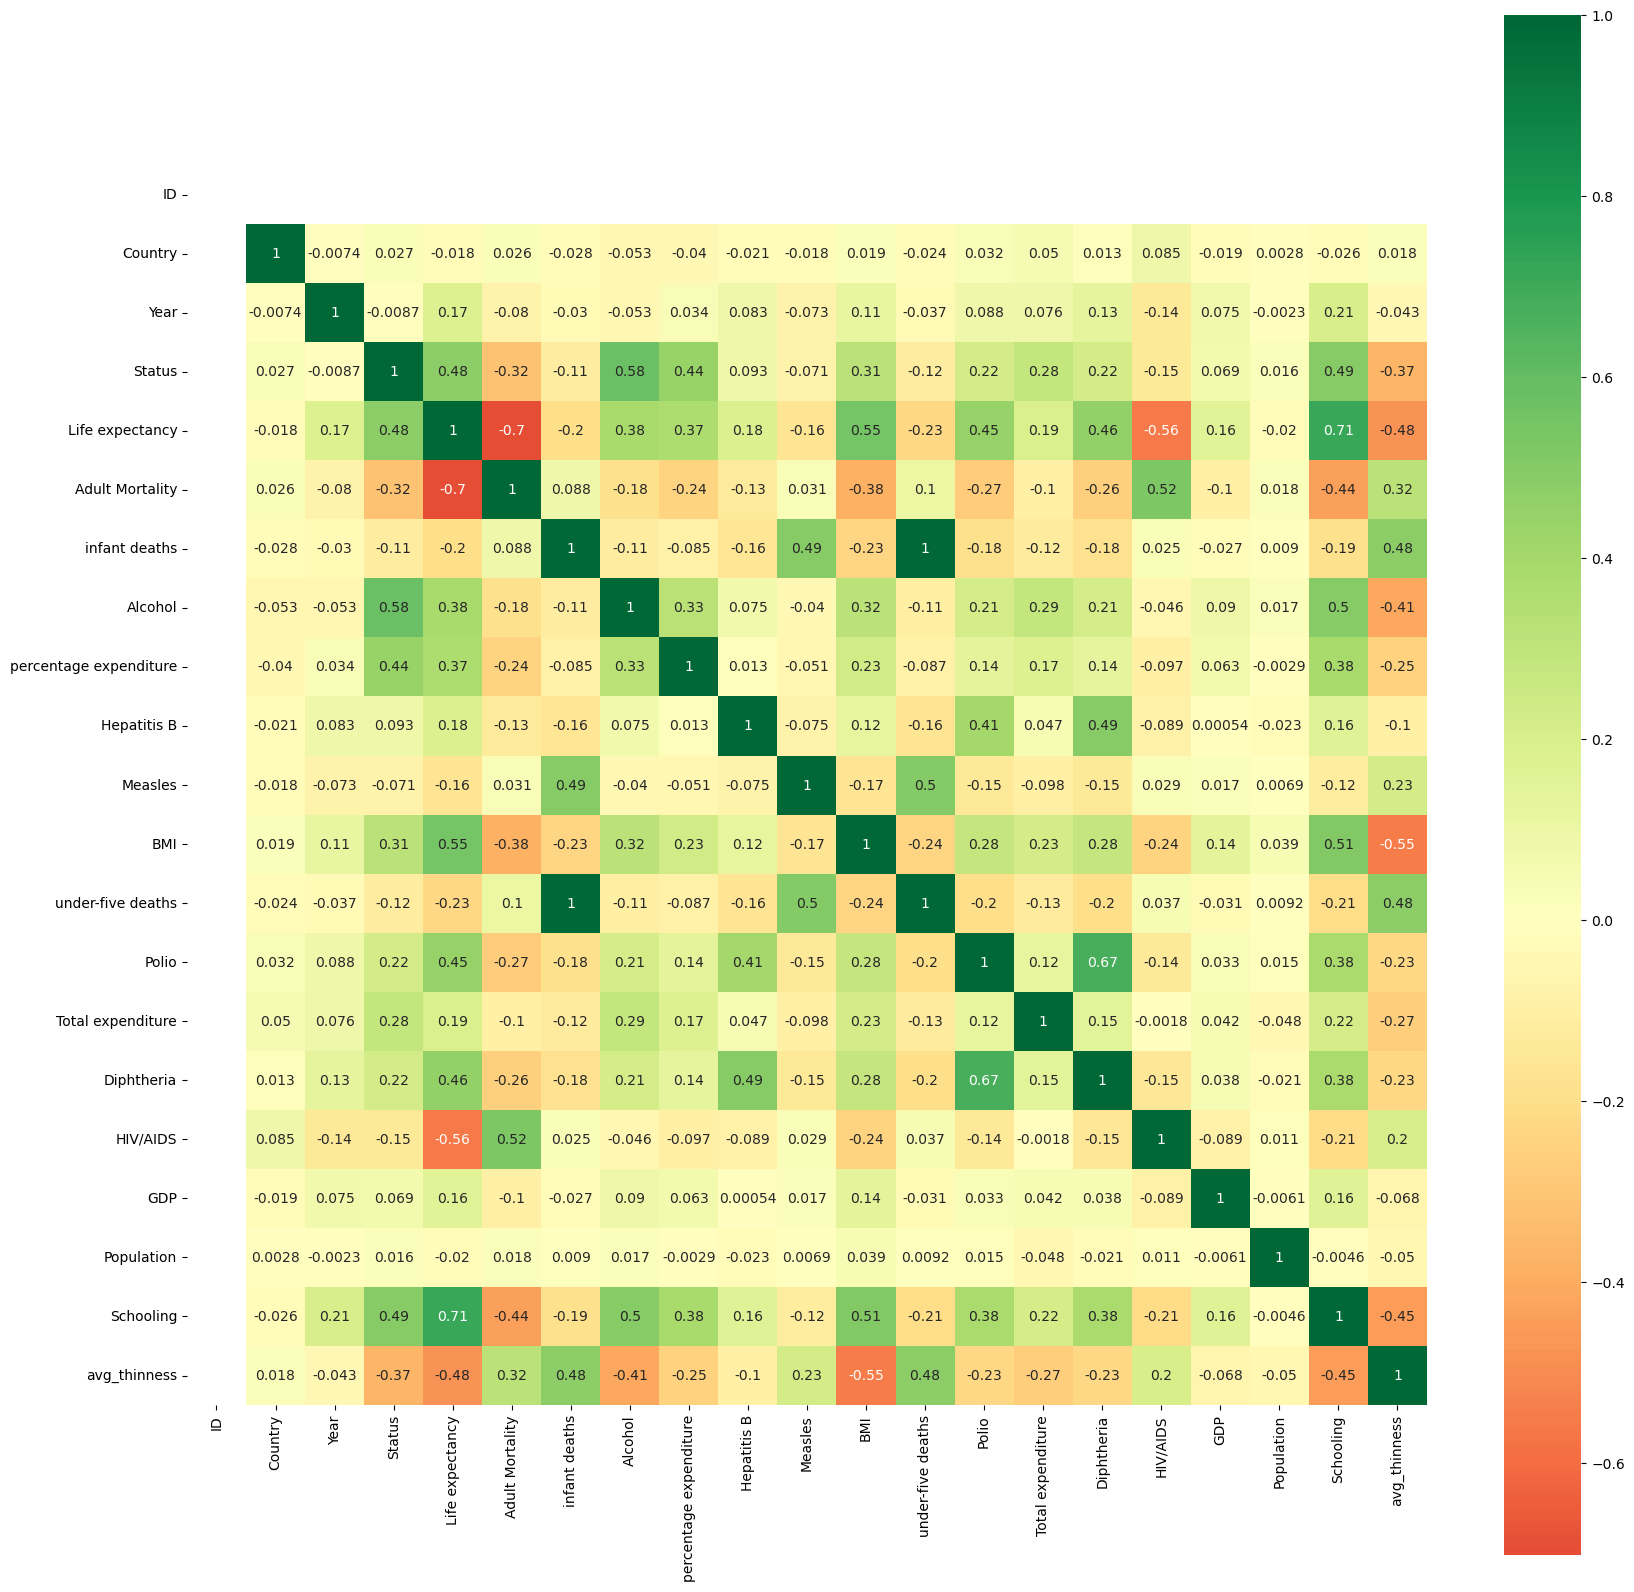

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [78]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Schooling',
       'avg_thinness'],
      dtype='object')

In [79]:
train['avg_thinness'] = (train["thinness  1-19 years"] + train["thinness 5-9 years"])/2

KeyError: 'thinness  1-19 years'

In [76]:
train = train.drop('thinness  1-19 years', axis=1)
train = train.drop("thinness 5-9 years", axis=1)
train = train.drop("Income composition of resources", axis=1)

KeyError: "['thinness  1-19 years'] not found in axis"

In [80]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Schooling',
       'avg_thinness'],
      dtype='object')

In [81]:
train['deaths'] = (train["infant deaths"] + train["under-five deaths"])/2

In [82]:
train = train.drop('infant deaths', axis=1)
train = train.drop("under-five deaths", axis=1)

<Axes: >

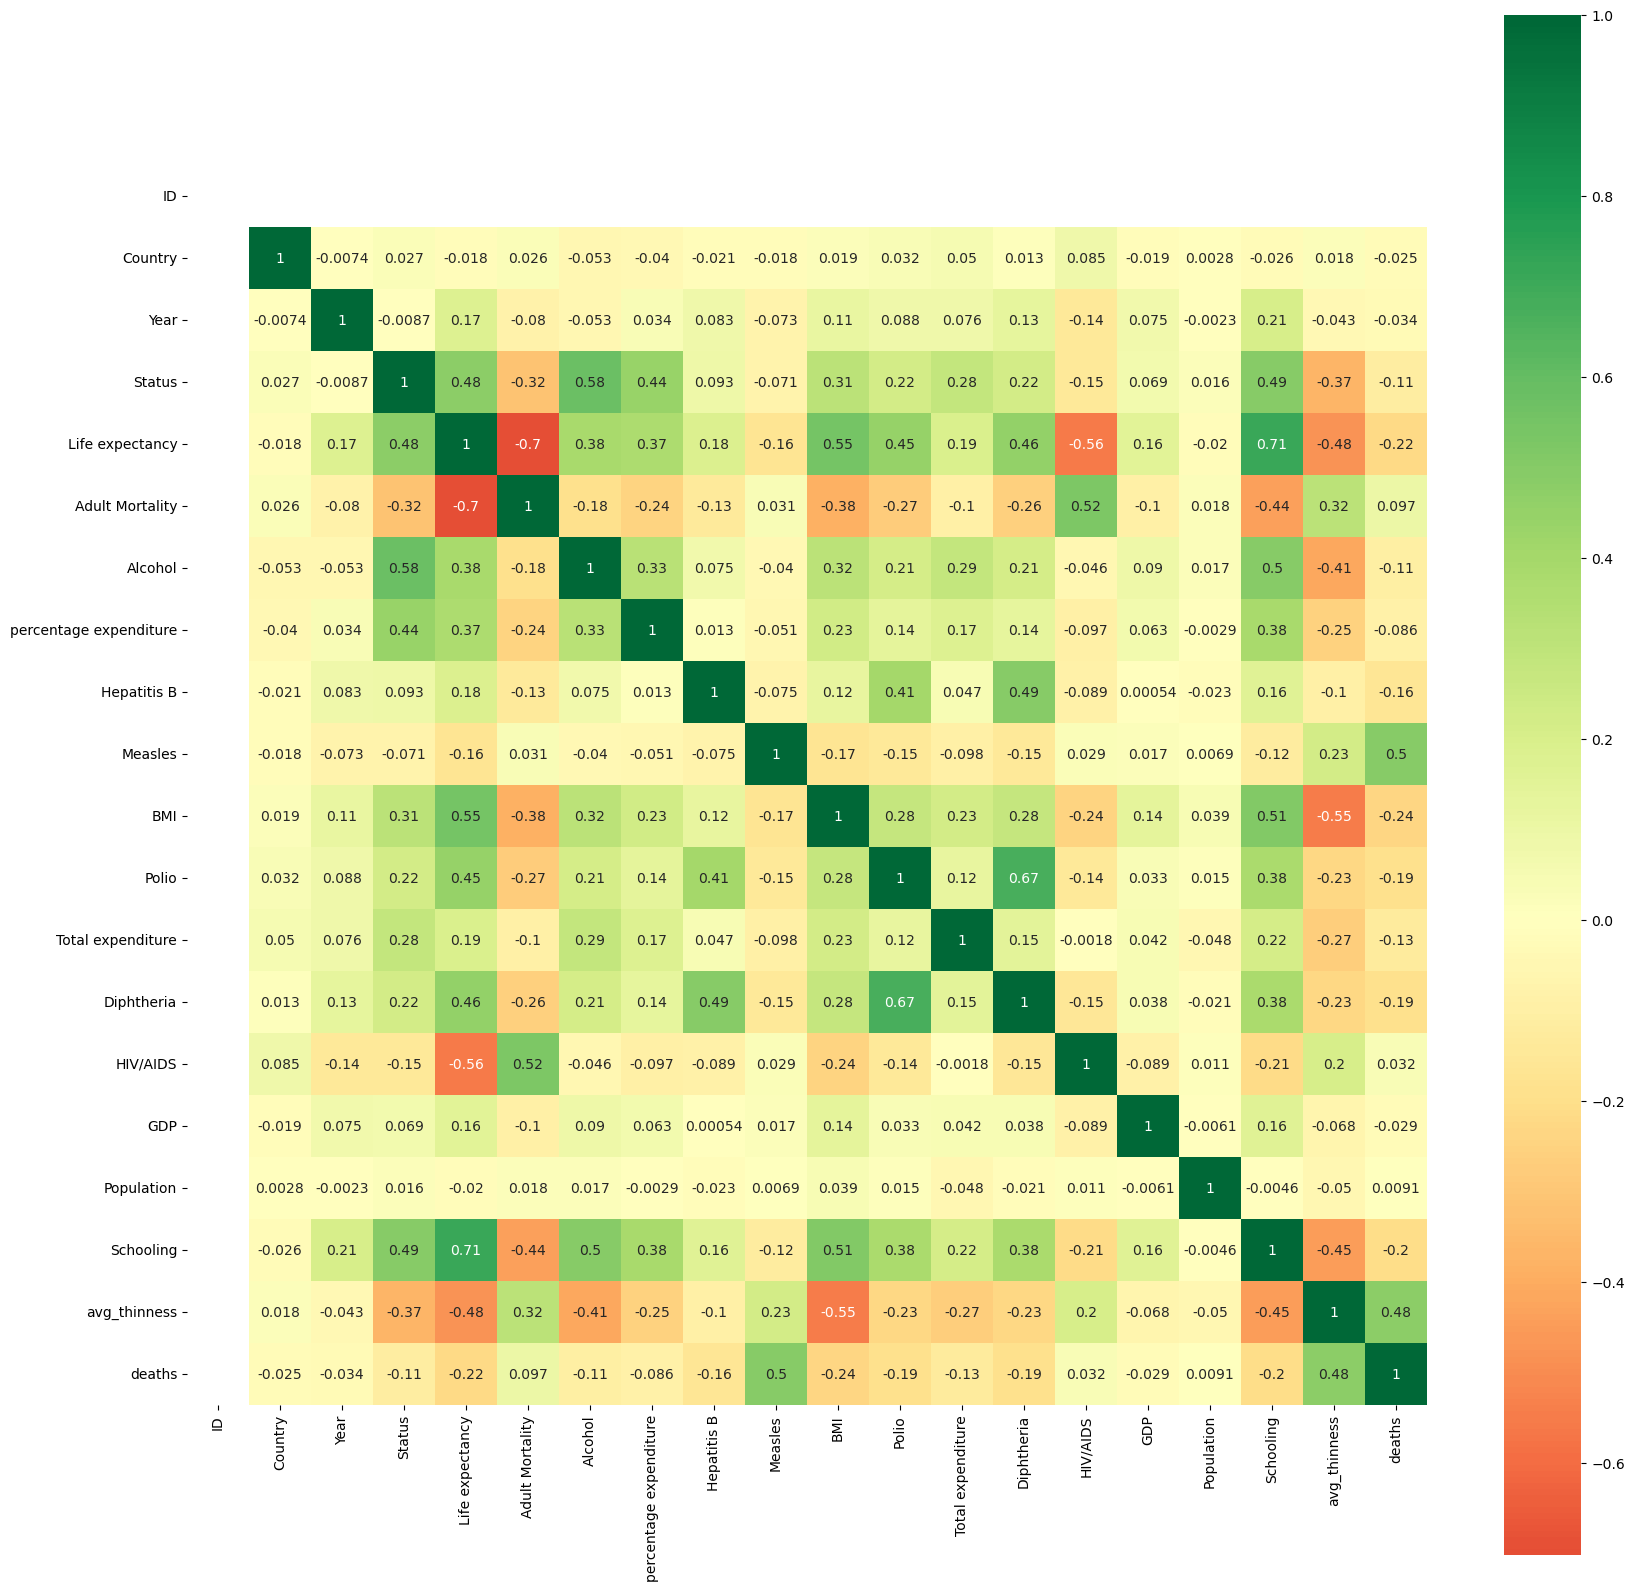

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

<Axes: >

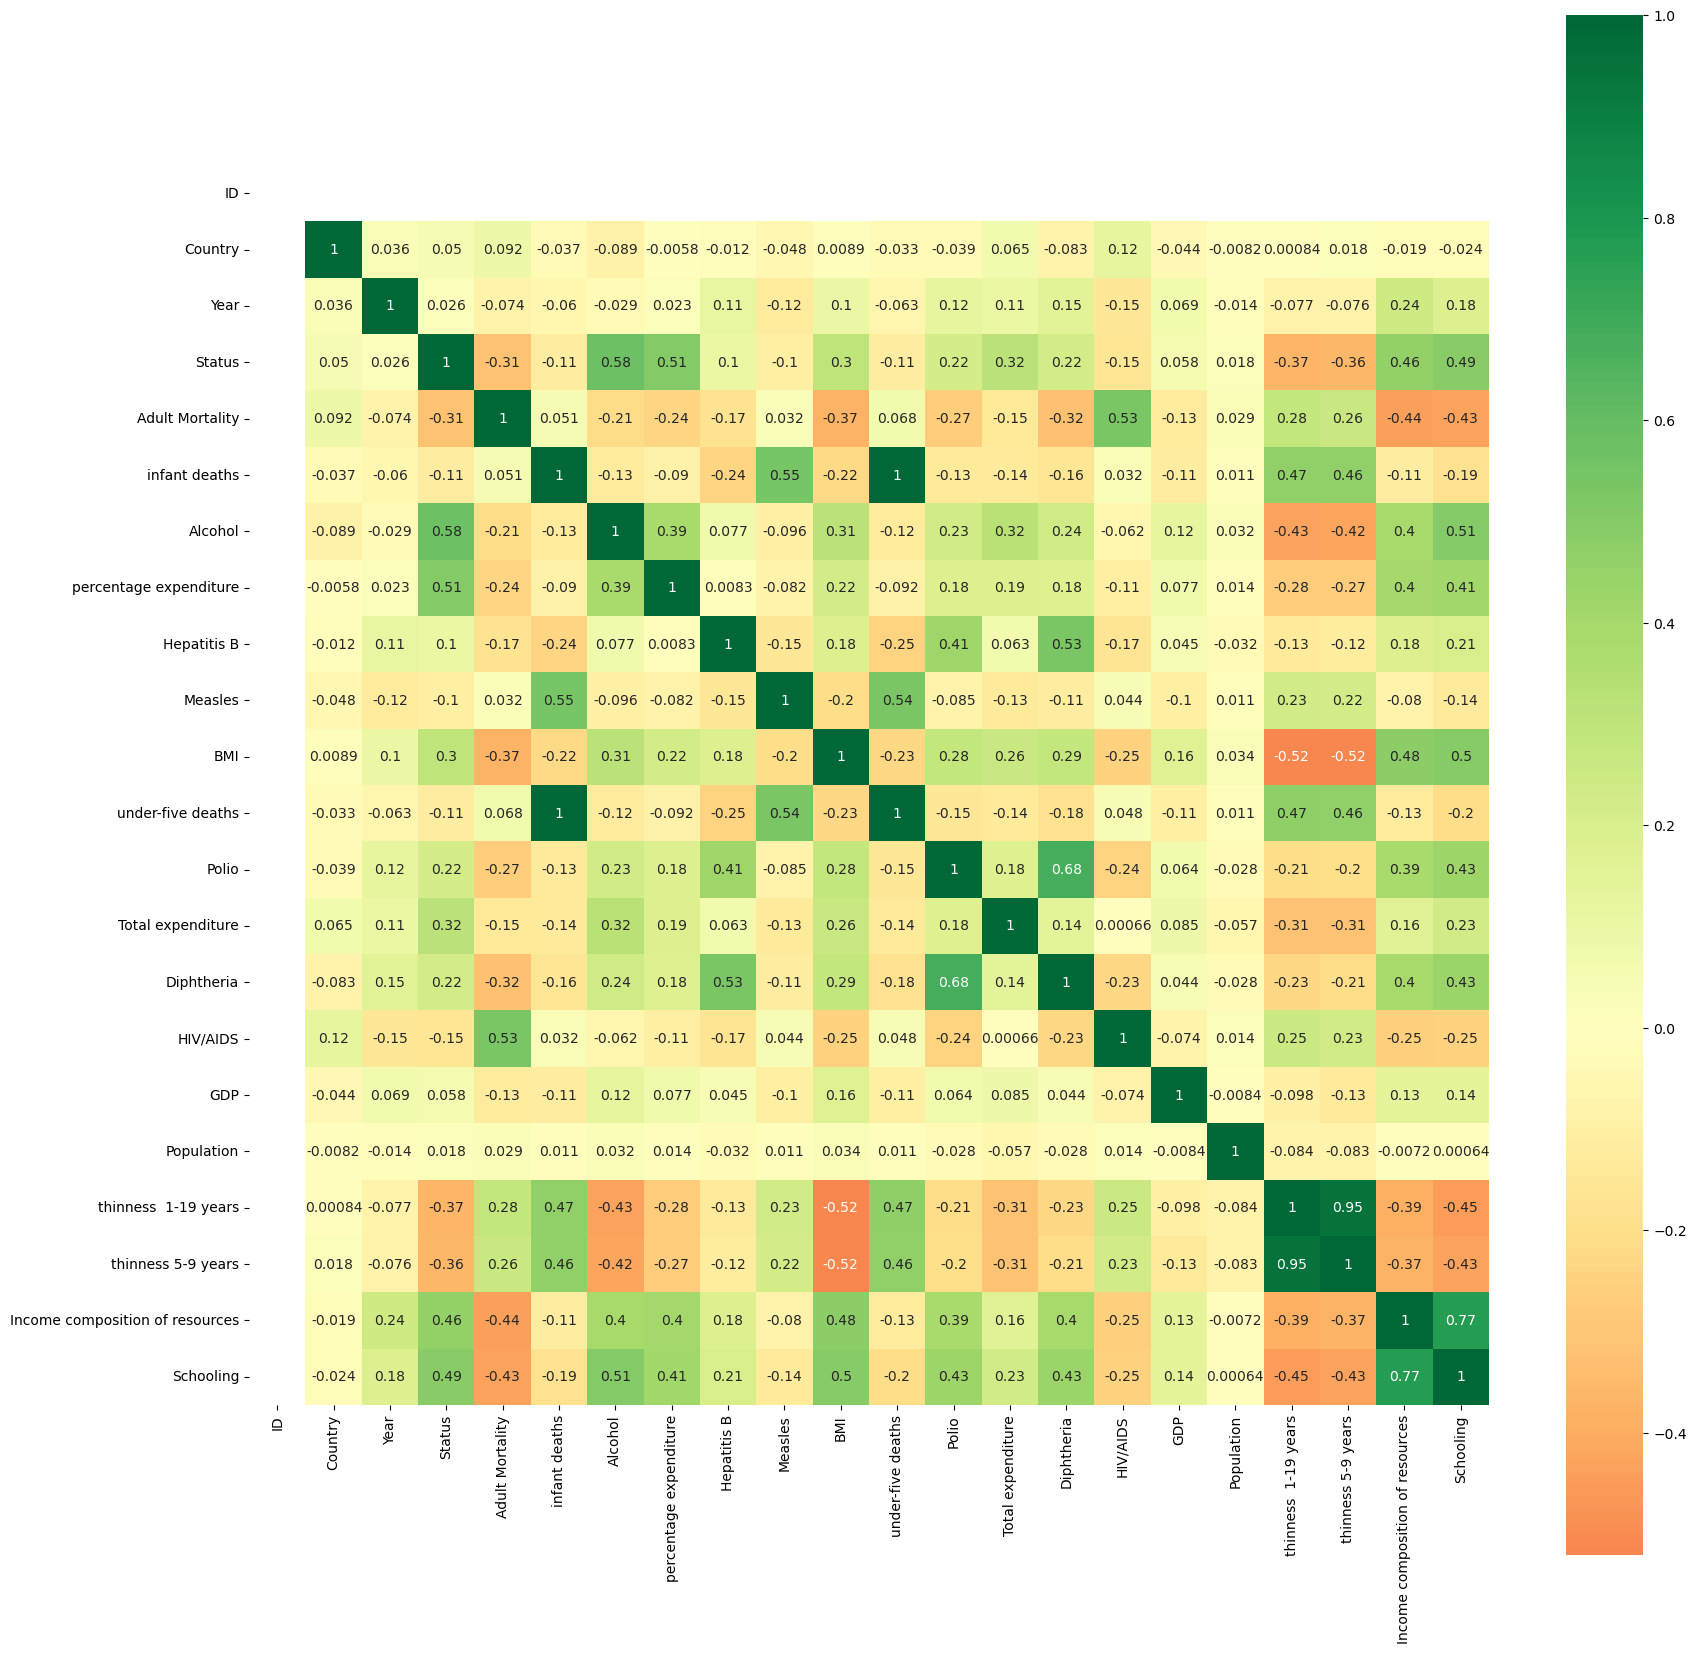

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(test.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [85]:
test['avg_thinness'] = (test["thinness  1-19 years"] + test["thinness 5-9 years"])/2

In [86]:
test = test.drop('thinness  1-19 years', axis=1)
test = test.drop("thinness 5-9 years", axis=1)
test = test.drop("Income composition of resources", axis=1)

In [87]:
test['deaths'] = (test["infant deaths"] + test["under-five deaths"])/2

In [88]:
test = test.drop('infant deaths', axis=1)
test = test.drop("under-five deaths", axis=1)

<Axes: >

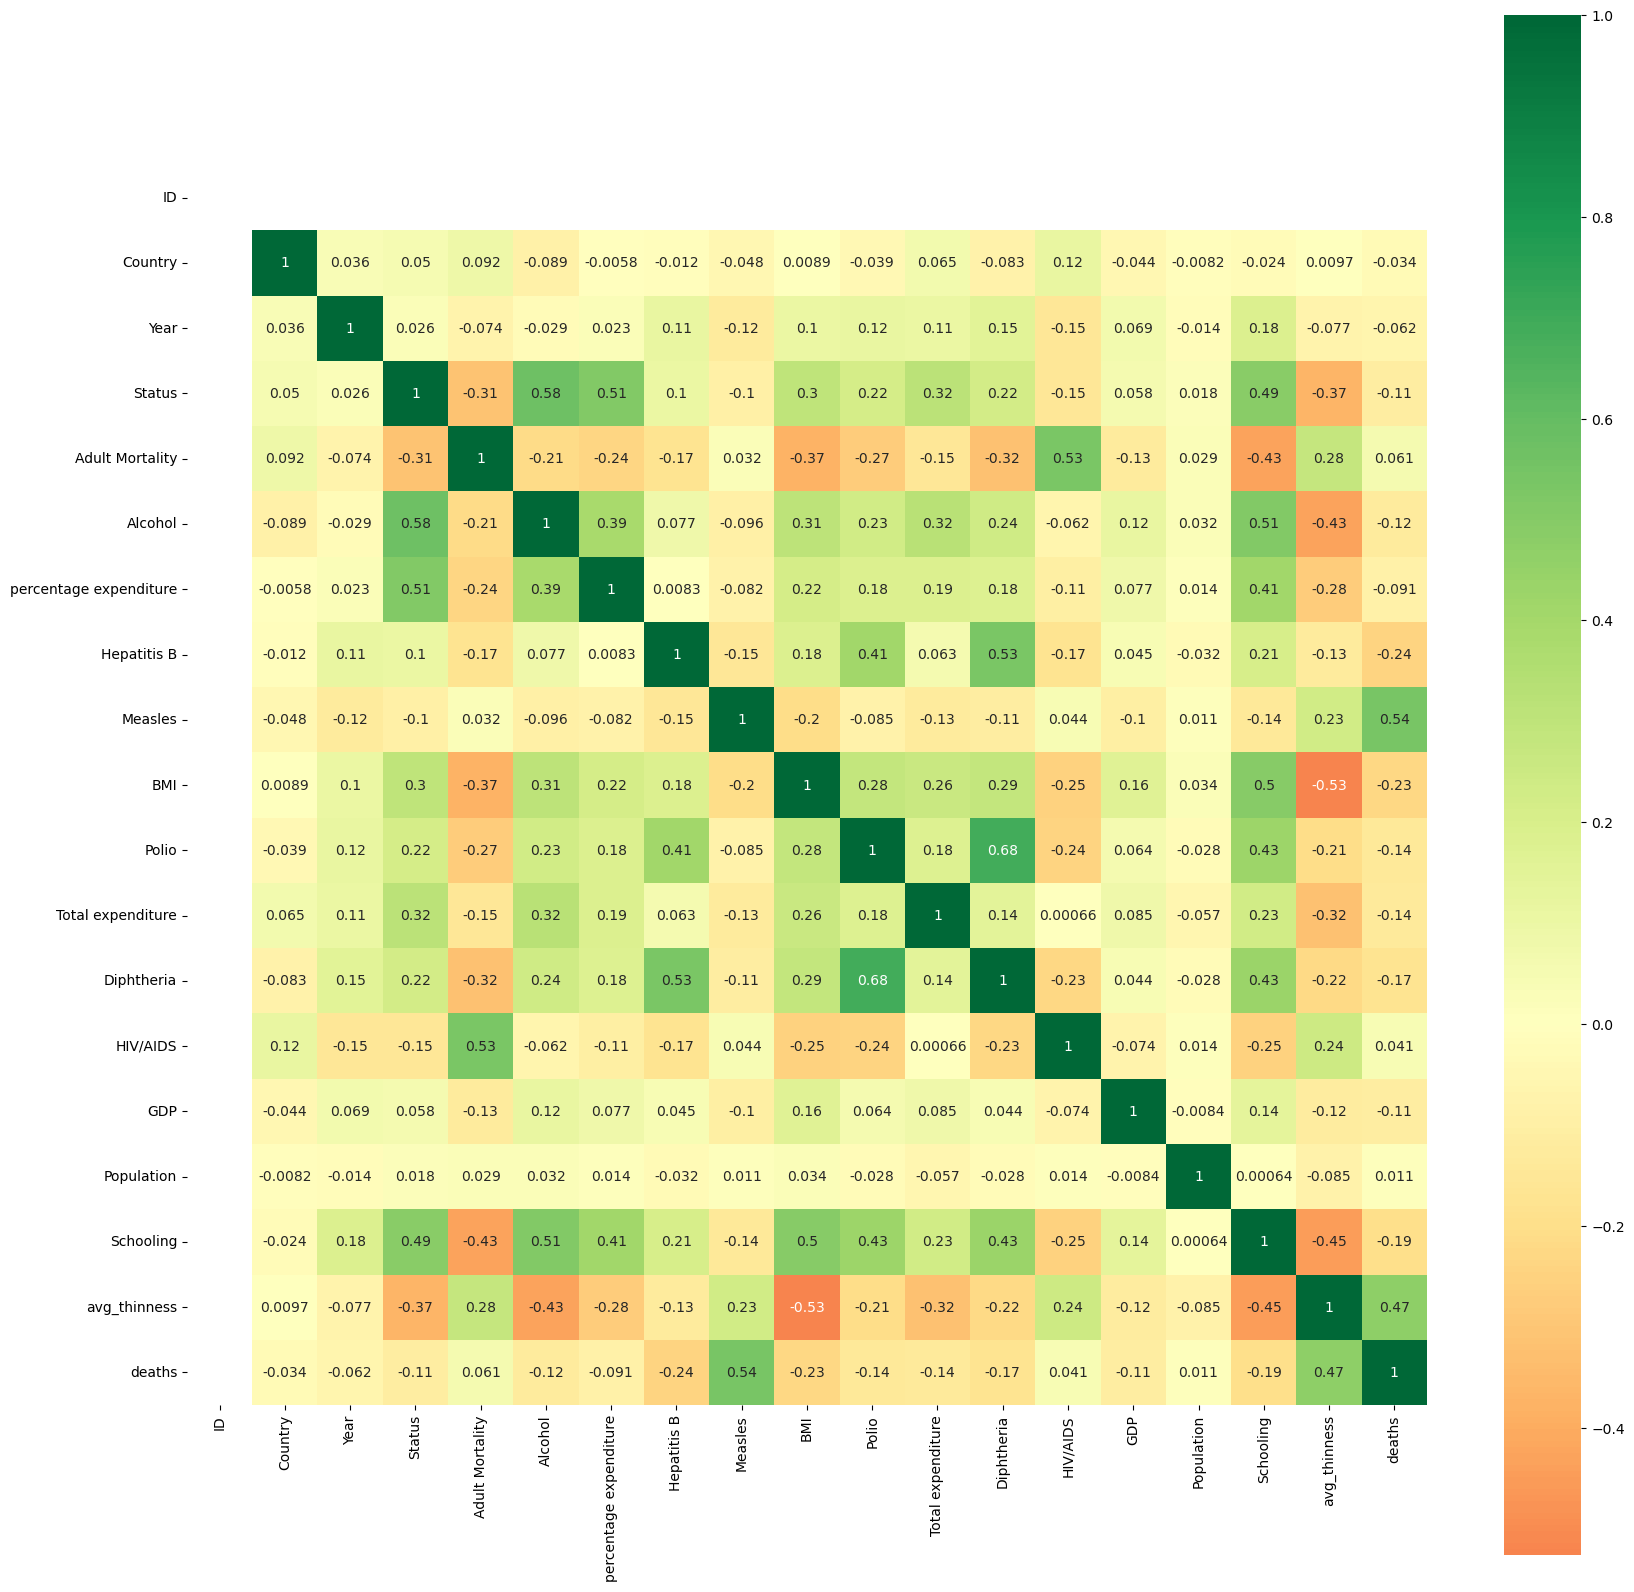

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(test.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [90]:
from sklearn.model_selection import train_test_split

x = train.drop(['ID','Life expectancy'], axis=1)
y = train['Life expectancy']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [92]:
reg.fit(x_train, y_train)

LinearRegression()

In [93]:
y_pred = reg.predict(x_train)

In [94]:
y_p_test = reg.predict(x_test)

In [95]:
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error

r2_score(y_train, y_pred)

0.8014407785068972

In [96]:
r2_score(y_test, y_p_test)

0.787347014398869

In [97]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred))

print(rmse)

4.29273347934205


In [98]:
rmse=np.sqrt(mean_squared_error(y_test, y_p_test))

print(rmse)

4.296199147119978


In [99]:
from sklearn.tree import DecisionTreeRegressor

TreeModel= DecisionTreeRegressor()

In [100]:
TreeModel.fit(x_train, y_train)

DecisionTreeRegressor()

In [101]:
y_pred = TreeModel.predict(x_train)

In [102]:
y_p_test = TreeModel.predict(x_test)

In [103]:
r2_score(y_train, y_pred)

1.0

In [104]:
r2_score(y_test, y_p_test)

0.9368300097947904

In [105]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred))

print(rmse)

0.0


In [106]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred))

print(rmse)

0.0


In [107]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=100)
xgboost.fit(x_train, y_train)
predictions = xgboost.predict(x_test)

In [108]:
xgboost.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
sample = pd.read_csv("sample_submission.csv")

In [110]:
sample.head()

,ID,Life expectancy
0,Sy75324907,0
1,Cr10129453,0
2,Mo67025598,0
3,Ba38246112,0
4,Ke57254548,0


In [111]:
out =xgboost.predict(test.drop('ID', axis= 1))

In [112]:
sample["Life expectancy"] = out

In [113]:
sample.describe()

,Life expectancy
count,588.000000
mean,68.964935
std,9.203667
min,43.165150
25%,62.910302
50%,71.016495
75%,75.309731
max,86.531372


In [114]:
sample.to_csv("submission005.csv", index=False)